In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv("train.csv")

In [3]:
#How big the data is

df.shape

(891, 12)

In [4]:
#how does the data look like

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S
623,624,0,3,"Hansen, Mr. Henry Damsgaard",male,21.0,0,0,350029,7.8542,NaN,S
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,E58,S
798,799,0,3,"Ibrahim Shawah, Mr. Yousseff",male,30.0,0,0,2685,7.2292,NaN,C


In [5]:
#information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Embarked', ylabel='count'>

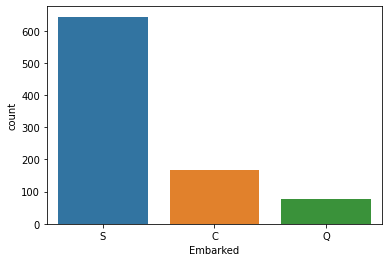

In [8]:
#Countplot

sns.countplot(df['Embarked'])

<Axes: ylabel='Sex'>

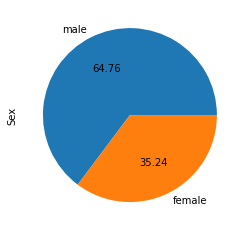

In [9]:
#Piechart

df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

Text(0, 0.5, 'Frequency')

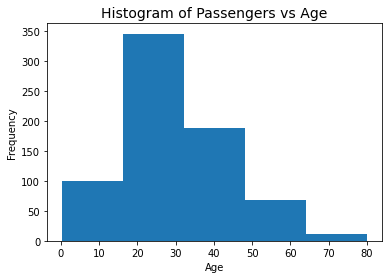

In [10]:
#Histogram

plt.hist(df['Age'],bins=5)
plt.title("Histogram of Passengers vs Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")

In [11]:
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

In [12]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Preprocessing
# ======================
num_features = ["Age", "Fare", "Parch", "SibSp", "Pclass"]
cat_features = ["Sex", "Embarked"]

num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])


In [15]:
# Decision Tree (Before Optimization)
# ======================
pipe_dt = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", SelectKBest(score_func=f_classif, k=5)),
    ("classifier", DecisionTreeClassifier())
])
pipe_dt.fit(X_train, y_train)
y_pred_dt = pipe_dt.predict(X_test)

In [16]:
# SVC (Before Optimization)
# ======================
pipe_svc = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", SelectKBest(score_func=f_classif, k=5)),
    ("classifier", SVC())
])
pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)

In [17]:
# Logistic Regression (Before Optimization)
# ======================
pipe_lr = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", SelectKBest(score_func=f_classif, k=5)),
    ("classifier", LogisticRegression(max_iter=200))
])
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

In [18]:
# Collect Results Before Optimization
# ======================
before_df = pd.DataFrame({
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_svc)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_svc)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_svc)
    ],
    "F1": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_svc)
    ]
}, index=["Logistic Regression", "Decision Tree", "SVC"])

In [19]:
print("\n=== Evaluation Before Optimization ===")
print(before_df)


=== Evaluation Before Optimization ===
                     Accuracy  Precision    Recall        F1
Logistic Regression  0.765363   0.695122  0.770270  0.730769
Decision Tree        0.804469   0.791045  0.716216  0.751773
SVC                  0.765363   0.847826  0.527027  0.650000


In [20]:
# Optimization with GridSearchCV
# ======================
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("selector", SelectKBest(score_func=f_classif, k=5)),
    ("classifier", LogisticRegression())
])


In [21]:
param_grid = [
    {
        "classifier": [LogisticRegression(max_iter=200)],
        "classifier__C": [0.01, 0.1, 1, 10]
    },
    {
        "classifier": [DecisionTreeClassifier()],
        "classifier__max_depth": [3, 5, 7, None],
        "classifier__min_samples_split": [2, 5, 10]
    },
    {
        "classifier": [SVC()],
        "classifier__C": [0.1, 1, 10],
        "classifier__kernel": ["linear", "rbf"]
    }
]

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare',
                                                                          'Parch',
                                                                          'SibSp',
                                                                          'Pclass']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Sex',
                                                                          'E...
                                       ('classifier', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=200)],
                          'classifier__C': [0.01, 0.1, 1, 10]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': [3, 5, 7, None],
                          'classifier__min_samples_split': [2, 5, 10]},
                         {'classifier': [SVC()], 'classifier__C': [0.1, 1, 10],
                          'classifier__kernel': ['linear', 'rbf']}],
             scoring='accuracy')

In [22]:
print("\n=== Best Model After Optimization ===")
print("Best Estimator:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


=== Best Model After Optimization ===
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'Parch',
                                                   'SibSp', 'Pclass']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                           

In [23]:
y_pred_opt = grid.predict(X_test)

In [24]:
after_df = pd.DataFrame({
    "Accuracy": [accuracy_score(y_test, y_pred_opt)],
    "Precision": [precision_score(y_test, y_pred_opt)],
    "Recall": [recall_score(y_test, y_pred_opt)],
    "F1": [f1_score(y_test, y_pred_opt)]
}, index=["Optimized Model"])

print("\n=== Evaluation After Optimization ===")
print(after_df)



=== Evaluation After Optimization ===
                 Accuracy  Precision    Recall    F1
Optimized Model  0.765363   0.847826  0.527027  0.65


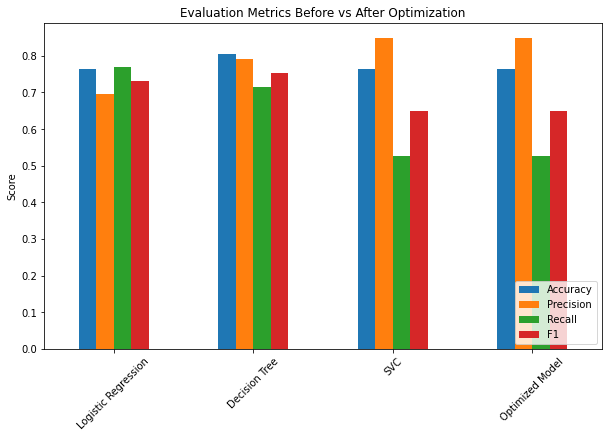

In [25]:
# Comparison Plot
# ======================
comparison_df = pd.concat([before_df, after_df])
comparison_df.plot(kind="bar", figsize=(10,6))
plt.title("Evaluation Metrics Before vs After Optimization")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


In [26]:
# Feature Importance from SelectKBest
# ======================
best_pipe = grid.best_estimator_
selector = best_pipe.named_steps["selector"]

In [27]:
# Get numeric + encoded categorical feature names
ohe = best_pipe.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
feature_names = num_features + list(ohe.get_feature_names_out(cat_features))

In [28]:
# Get scores and mask selected features
scores = selector.scores_
mask = selector.get_support()

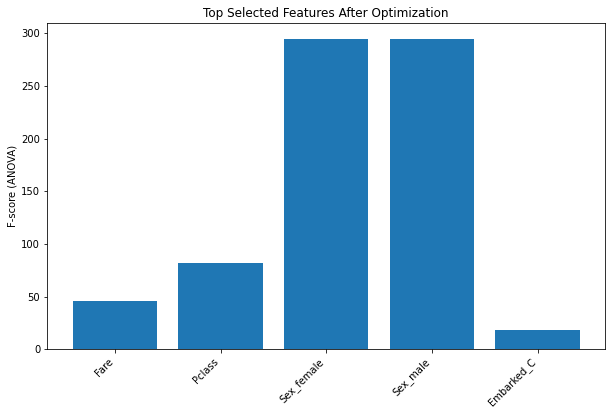

In [29]:
plt.figure(figsize=(10,6))
plt.bar(np.array(feature_names)[mask], scores[mask])
plt.ylabel("F-score (ANOVA)")
plt.title("Top Selected Features After Optimization")
plt.xticks(rotation=45, ha="right")
plt.show()

In [30]:
test_input = pd.DataFrame([{
    "Pclass": 2,
    "Sex": "male",
    "Age": 31.0,
    "SibSp": 0,
    "Parch": 0,
    "Fare": 10.5,
    "Embarked": "S"
}])

In [31]:
# Use the best pipeline (optimized model)
prediction = grid.best_estimator_.predict(test_input)

print("Prediction:", prediction[0])
if prediction[0] == 0:
    print(" The passenger did NOT survive")
else:
    print(" The passenger survived")

Prediction: 0
 The passenger did NOT survive
